# Independent Two-Sample T-test
reference:  https://www.youtube.com/watch?v=8aaIdXENNJI

We first establish the population.

We then sample from that population. The sampling is done such that the data is NOT paired (independent samples).

We then perform the regular (**non-paired**) T-Test.

The null hypothesis is they are the same distribution.  Our hope is to reject the null from which we can conclude they are different distributions.

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [102]:
%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()

In [180]:
import pandas as pd
df_population = pd.read_csv('dataset\\Data-sets\\blood_pressure.csv')

In [191]:
sample_size = 5
sample_size = 120

# non-paired case
temp_df = df_population.sample(n=sample_size, frac=None, replace=False, weights=None, random_state=None, axis=None)
temp_before = temp_df['bp_before'].values
temp_df = df_population.sample(n=sample_size, frac=None, replace=False, weights=None, random_state=None, axis=None)
temp_after = temp_df['bp_after'].values

df = pd.DataFrame(columns = ['before', 'after'])
df['before'] = temp_before
df['after'] = temp_after


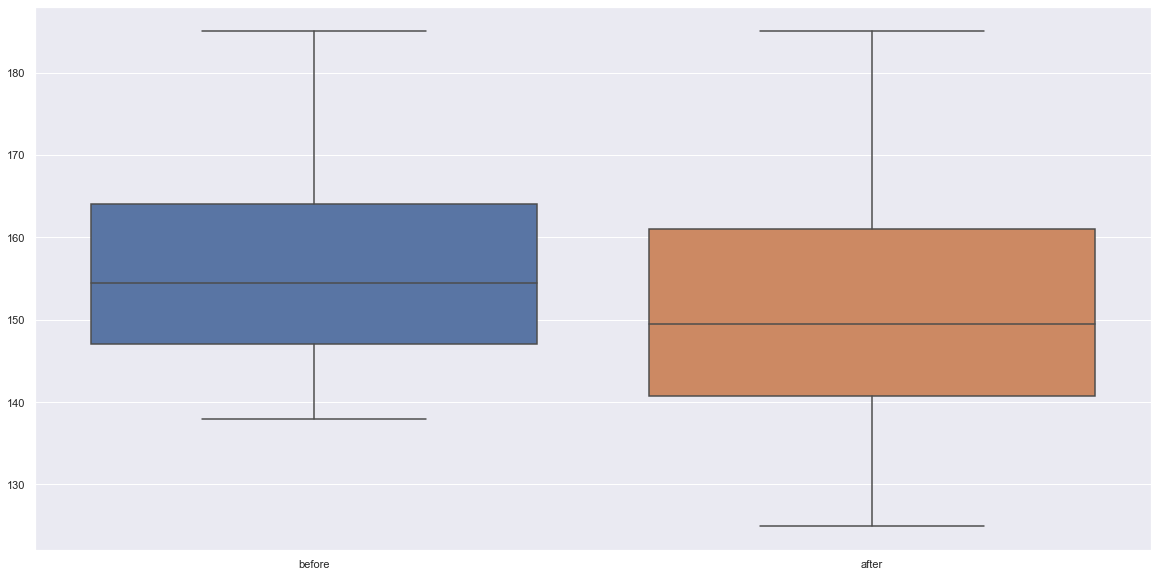

In [192]:
# check for outliers
plt.figure()
ax = sns.boxplot(data=df)

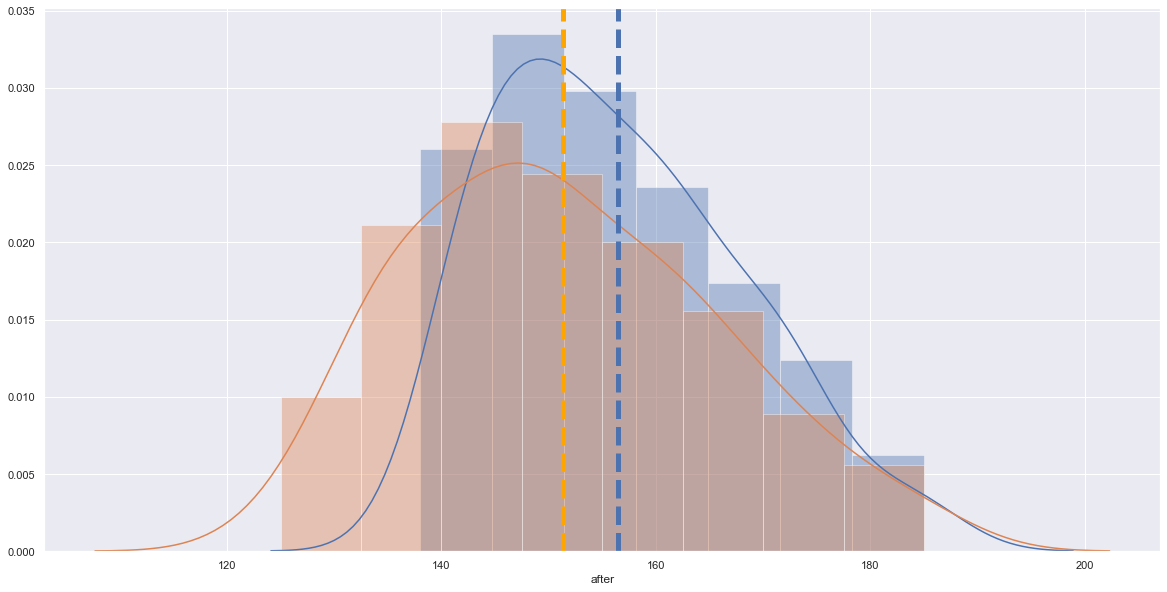

In [193]:
# check for normal distribution
plt.figure()
ax1 = sns.distplot(df['before'])
ax2 = sns.distplot(df['after'])
plt.axvline(np.mean(before), color='b',      linestyle='dashed', linewidth=5)
plt.axvline(np.mean(after),  color='orange', linestyle='dashed', linewidth=5)

In [ ]:
stats.probplot(df['bp_difference'], plot= plt)
plt.title('Blood pressure Difference Q-Q Plot')
plt.savefig('blood pressure difference qq plot.png')

In [196]:
# perform **independent** t-test to determine if they are different or the same...
# if your p-value is greater than alpha then you fail to reject the hypothesis
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if (p > alpha):
        print('(p > alpha)... Same distributions (fail to reject H0)')
    else:
        print('(p < alpha)... Different distributions (reject H0)')
    print('Sample size=%d' % (sample_size))

In [197]:
alpha = 0.05
compare_2_groups(df['before'], df['after'], alpha, sample_size)

Statistics=3.067, p=0.002
(p < alpha)... Different distributions (reject H0)
Sample size=120
